# Exploring the Power of the STEM Derivative Method

In this notebook, we demonstrate the accuracy and stability of the **STEM (Statistical Tangent Estimation Method)** for numerical differentiation by comparing it to the classic **five-point stencil** method. Both techniques are applied to a noisy function, and their outputs are analyzed across many realizations of Gaussian noise.

We visualize the **distribution of estimated derivatives** using histograms and boxplots. These comparisons highlight the robustness of the STEM method: it consistently yields **tighter, more centered distributions**, while the stencil method exhibits significantly broader spread and higher variance under the same noise conditions.

The results clearly illustrate that STEM provides more **reliable derivative estimates**, especially in the presence of noise—making it a compelling alternative for derivative approximation in practical scenarios.


## Preliminaries

We first import the necessary libraries and modules, including the `HybridDerivativeCalculator` for derivative calculations and `DerivativePlotter` for visualizations.
We then define a set of functions for which we will compute the derivatives. These functions include linear, quadratic, cubic, trigonometric, exponential, and logarithmic functions.

After defining the functions, we create an instance of `HybridDerivativeCalculator` for a specific function (in this case, a cubic function) and a central value. We also create an instance of `DerivativePlotter` for visualizing the results.

In [1]:
import numpy as np

from derivkit import HybridDerivativeCalculator
from derivkit import DerivativePlotter


In [2]:
# Define functions to calculate derivatives of
functions_dict = {
    'linear': lambda x: 2 * x + 3,
    'quadratic': lambda x: x ** 2 - 4 * x + 2,
    'cubic': lambda x: 2 * x + x ** 3,
    'trigonometric': lambda x: np.sin(x),
    'exponential': lambda x: np.exp(x),
    'logarithmic': lambda x: np.log(x + 1) if x > 0 else 0  # Avoid log(0)
}

In [3]:
# Create a DerivativeCalculator object
# Choose a function and the central value
calc = HybridDerivativeCalculator(functions_dict["cubic"], 10)
plotter = DerivativePlotter(functions_dict["cubic"], 10)
noise_std = 1.5  # Standard deviation of the noise
iterations = 1000  # Number of iterations to run

# Calculate the derivative using the stem method
stem_derivative = calc.stem_method()
print(f"Stem Method Derivative value: {stem_derivative:.2f}")
# Calculate the derivative using the five-point stencil method
stencil_derivative = calc.five_point_stencil_method()
print(f"Five-Point Stencil Derivative value: {stencil_derivative:.2f}")


Stem Method Derivative value: 302.72
Five-Point Stencil Derivative value: 302.00


## Visualizing the Derivative Calculation

We can visualize the derivative estimation using the `plot_derivative` method from the `DerivativePlotter` class.
The STEM method computes the derivative at a given point by sampling the function in a small neighborhood around it and fitting a line through the sampled values, effectively estimating the local tangent.

This approach is more robust than traditional finite difference methods (like the five-point stencil) because it naturally reduces the impact of noise by leveraging local fitting rather than relying on fixed, noise-sensitive difference formulas.


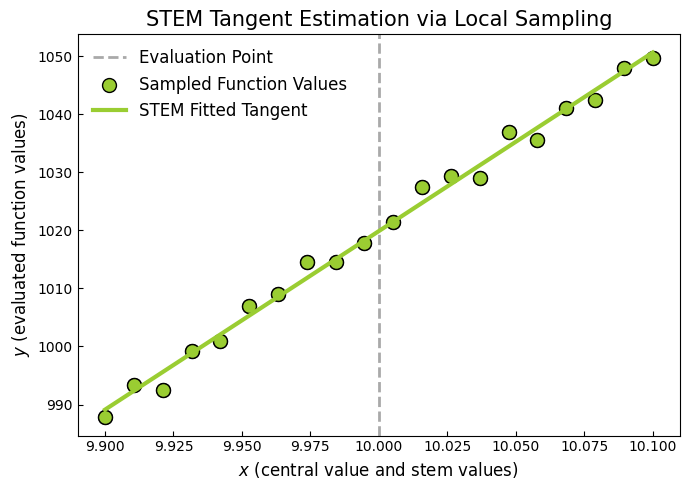

In [4]:
# Demonstrate the stem method using a built-in function
plotter.demonstrate_stem_method(num_points=20, noise_std=noise_std, save_fig=True)


## Comparing Derivative Distributions

We now compare the distribution of derivative estimates obtained using the STEM method and the standard five-point stencil method.
The histogram shows the spread of values across many noisy realizations, while the box plot summarizes the central tendency and dispersion.

In the histogram, we also include the derivative computed using the `numdifftools` library (marked as "ND" in the legend) for reference.
This provides a useful benchmark, since `numdifftools` performs high-accuracy numerical differentiation based on Richardson extrapolation.

The STEM method consistently yields tighter distributions with lower variance and fewer outliers, highlighting its robustness to noise.
In contrast, the stencil method shows a broader spread, indicating higher sensitivity to fluctuations in the input.


/Users/niko/Documents/Research/Derivative-Calculator/derivkit/hybrid.py:74: UserWarning: [stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
  warnings.warn(msg)


[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.

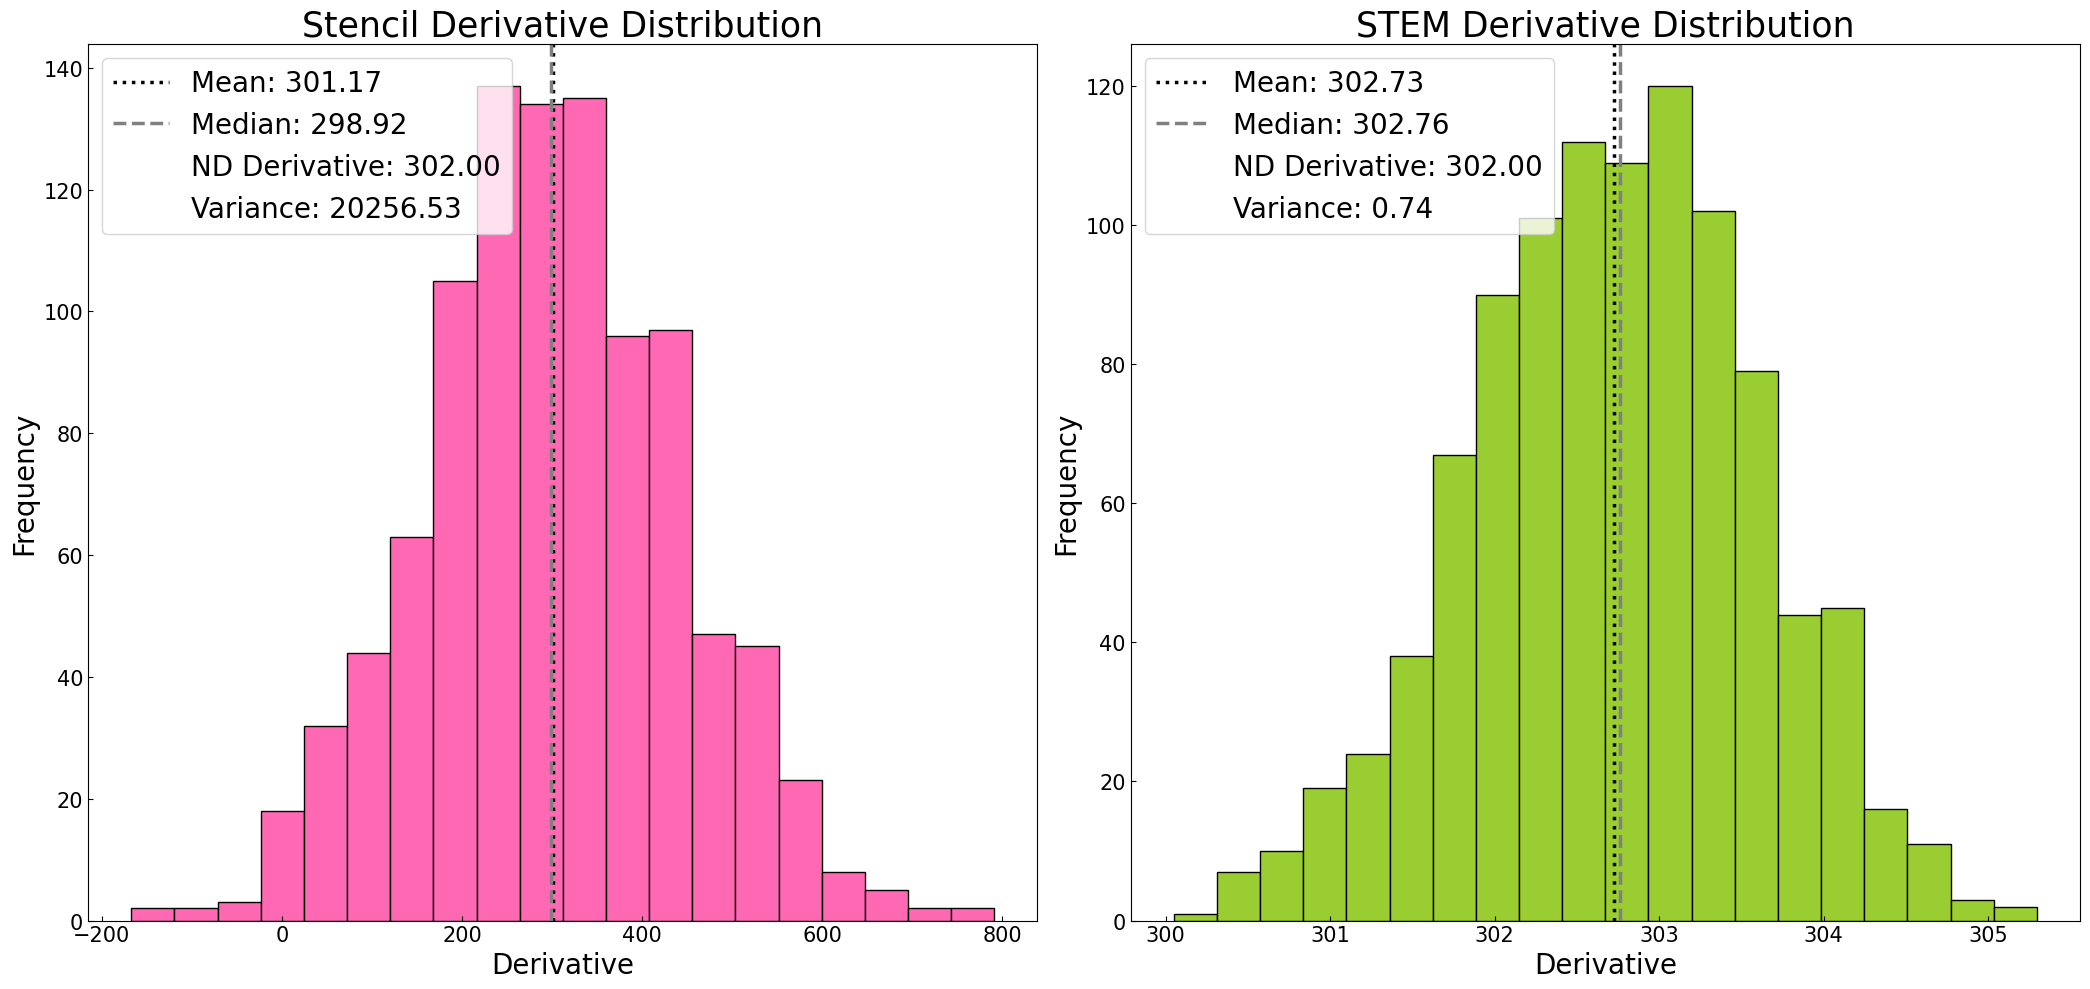

In [5]:
# Calculate derivatives with noise
# First use the 'five_point_stencil' method to calculate the derivatives
# Output will be a list of values, each value is the derivative calculated at a point
five_point_distr = calc.calculate_derivatives_with_output_noise(method='five_point_stencil',
                                                                iterations=iterations,
                                                                noise_std=noise_std)
# Now use the 'stem' method to calculate the derivatives
# Output will be a list of values, each value is the derivative
stem_distr = calc.calculate_derivatives_with_output_noise(method='stem',
                                                          iterations=iterations,
                                                          noise_std=noise_std)

# Plot the distributions using the plot_derivative_distributions method
# Not that the noise is Gaussian so the distributions should be normal
# but the output will vary depending on the noise every time the code is run!!!
plotter.plot_derivatives_hist(five_point_distr,
                                      stem_distr,
                                      method1_name='Stencil',
                                      method2_name='STEM',
                                      bins=20,
                                      save_fig=True)


[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.

/Users/niko/Documents/Research/Derivative-Calculator/derivkit/hybrid.py:74: UserWarning: [stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
  warnings.warn(msg)


[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.
[stem_method] Function not smooth or differentiable at central_value; excluding 0% offset.

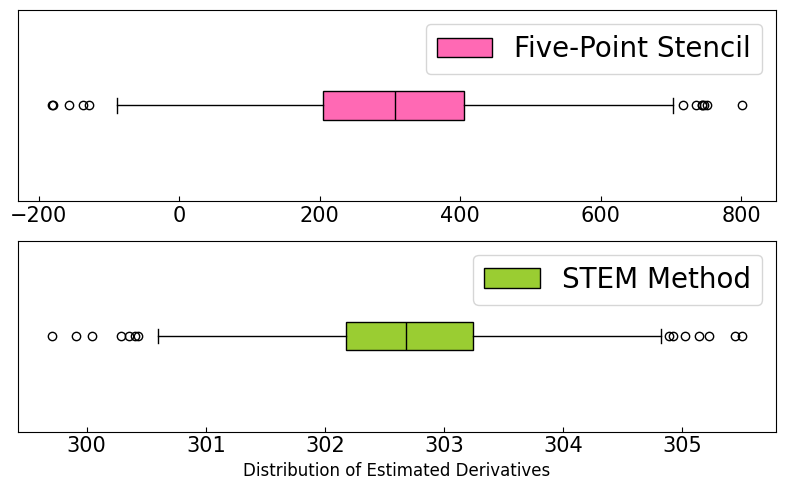

In [6]:
# Another way to demonstrate the power of the stem method visually is to
# use a box plot. Use a built-in function
plotter.plot_derivatives_boxplot(iterations=iterations, noise_std=noise_std, save_fig=True)
